In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [2]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)

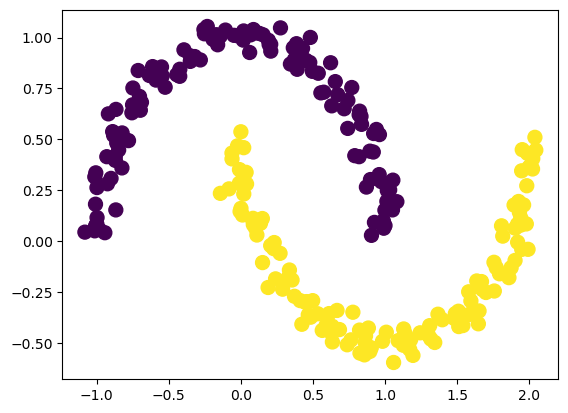

In [3]:
plt.scatter(X[:,0],X[:,1], c=y, s=100)
plt.show()

In [4]:

model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\vaish\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
model.get_weights()[0]

array([[-0.68536556, -0.6580733 ,  0.01794863,  0.24687362, -0.43550187,
         0.64244384,  0.3686332 ,  0.2001065 , -0.45480308,  0.47540528],
       [-0.6823388 ,  0.22348368,  0.6374555 , -0.22577661,  0.5585324 ,
         0.08666098, -0.60480845,  0.3733036 , -0.19751799,  0.39340693]],
      dtype=float32)

In [7]:
old_weights = model.get_weights()[0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5100 - loss: 0.7006
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5100 - loss: 0.6974
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5100 - loss: 0.6947
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5100 - loss: 0.6933
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5100 - loss: 0.6933
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5100 - loss: 0.6924
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5100 - loss: 0.6922
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5100 - loss: 0.6916
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5100 - loss: 0.6912
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5100 - loss: 0.6908
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5100 - loss: 0.6906
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5100 - lo

In [10]:
new_weights = model.get_weights()[0]

In [11]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [12]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [13]:
gradient

array([[ -717.41925,   397.88565,   669.8612 ,  -539.4933 ,   248.03716,
         -420.45728,   151.71146,  -539.20764,   313.43765,  -501.96146],
       [ 1030.6527 ,  -969.5738 , -1149.0557 ,  1073.4696 ,  -753.5782 ,
          974.5746 ,   158.7991 ,   965.9501 ,  -821.99664,  1036.6454 ]],
      dtype=float32)

In [14]:
percent_change

array([[ 104.67688 ,   60.46221 , 3732.1028  ,  218.53017 ,   56.954327,
          65.44655 ,   41.155125,  269.46036 ,   68.91723 ,  105.58601 ],
       [ 151.04707 ,  433.84546 ,  180.2566  ,  475.4565  ,  134.92113 ,
        1124.583   ,   26.2561  ,  258.75726 ,  416.16293 ,  263.5046  ]],
      dtype=float32)

In [15]:
old_weights

array([[-0.68536556, -0.6580733 ,  0.01794863,  0.24687362, -0.43550187,
         0.64244384,  0.3686332 ,  0.2001065 , -0.45480308,  0.47540528],
       [-0.6823388 ,  0.22348368,  0.6374555 , -0.22577661,  0.5585324 ,
         0.08666098, -0.60480845,  0.3733036 , -0.19751799,  0.39340693]],
      dtype=float32)

In [16]:
new_weights

array([[ 0.03205372, -1.055959  , -0.6519126 ,  0.78636694, -0.68353903,
         1.0629011 ,  0.21692175,  0.7393142 , -0.76824075,  0.97736675],
       [-1.7129915 ,  1.1930575 ,  1.7865112 , -1.2992462 ,  1.3121107 ,
        -0.88791364, -0.76360756, -0.59264654,  0.6244787 , -0.64323854]],
      dtype=float32)

In [17]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
old_weights = model.get_weights()[0]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6700 - loss: 0.6926
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8700 - loss: 0.6910
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8750 - loss: 0.6883
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8500 - loss: 0.6851
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8550 - loss: 0.6807
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8650 - loss: 0.6751
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8750 - loss: 0.6672
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8700 - loss: 0.6570
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8750 - loss: 0.6420
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8650 - loss: 0.6201
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8450 - loss: 0.5901
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8350 - lo

In [22]:
new_weights = model.get_weights()[0]

In [23]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [24]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [25]:
gradient

array([[-2.4375385e+02,  4.1082142e+01,  7.1591759e+01, -3.3295094e+01,
         3.4384426e-01,  3.3441280e+01,  1.3238408e+02,  1.2462759e+02,
        -3.7520050e+01,  4.1680096e+01],
       [-3.7128006e+02, -8.3054092e+01, -1.3690074e+02, -1.1554817e+02,
        -7.4868225e+01, -8.7713417e+01, -6.5369377e+01, -7.0143936e+01,
         9.2877266e+01,  8.1371660e+00]], dtype=float32)

In [26]:
percent_change

array([[5.4391407e+01, 1.2215965e+01, 1.0694190e+02, 5.3425803e+00,
        1.8117081e-01, 4.7349049e+01, 3.5922298e+01, 1.7825880e+01,
        6.6152306e+00, 2.6394297e+01],
       [1.0279239e+02, 5.4393890e+01, 1.2762415e+03, 1.8387354e+02,
        2.1736088e+01, 1.3023066e+01, 1.8384160e+02, 1.4556707e+01,
        1.8198345e+01, 1.5251359e+00]], dtype=float32)

In [27]:
old_weights

array([[ 0.4481477 , -0.3362988 , -0.06694454,  0.6232025 ,  0.18979013,
         0.07062715, -0.368529  , -0.69913846,  0.56717676, -0.15791327],
       [-0.3611941 ,  0.15269011,  0.01072687, -0.06284112, -0.34444207,
         0.6735236 , -0.03555745, -0.48186678, -0.5103611 , -0.53353715]],
      dtype=float32)

In [28]:
new_weights

array([[ 0.69190156, -0.37738094, -0.1385363 ,  0.6564976 ,  0.18944629,
         0.03718587, -0.5009131 , -0.82376605,  0.6046968 , -0.19959337],
       [ 0.01008598,  0.23574421,  0.14762762,  0.05270706, -0.26957384,
         0.761237  ,  0.02981193, -0.41172284, -0.60323834, -0.5416743 ]],
      dtype=float32)